In [15]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
labelencoder = LabelEncoder()

In [16]:
path = 'StudentsPerformance.csv'
df = pd.read_csv(path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.shape

(1000, 8)

In [18]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [19]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

The data cleaning was performed and no null were found, The data is tuned

In [21]:
df.rename(columns = {"race/ethnicity" : "race_ethnicity","parental level of education":"parental_level_of_education", 
                      "test preparation course":"test_preparation_course","math score":"math_score","reading score":"reading_score",
                      "writing score":"writing_score", },inplace=True)

In [22]:
df.gender = pd.Categorical(df.gender)
df.race_ethnicity = pd.Categorical(df.race_ethnicity)
df.parental_level_of_education = pd.Categorical(df.parental_level_of_education)
df.lunch = pd.Categorical(df.lunch)
df.test_preparation_course  = pd.Categorical(df.test_preparation_course)

Doing hot-label-encoding, becasue the linear regression requires numerical data, the problem is, our dataa has categorical values, so we need to do hot label encoding to remove the discrapanices.

In [23]:
df2 = pd.DataFrame(df["gender"])
df2['gender_cat'] = labelencoder.fit_transform(df2["gender"])
df2

,gender,gender_cat
0,female,0
1,female,0
2,female,0
3,male,1
4,male,1
...,...,...
995,female,0
996,male,1
997,female,0
998,female,0


In [24]:
df2["gender"].append(df2["gender_cat"]).unique()

array(['female', 'male', 0, 1], dtype=object)

In [25]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df2[['gender_cat']]).toarray())
enc_df = enc_df.rename(columns = {0 : "female",1: "male"})
df = df.join(enc_df)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,female,male
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0


In [26]:
df2 = pd.DataFrame(df["race_ethnicity"])
df2['race_ethnicity_cat'] = labelencoder.fit_transform(df2["race_ethnicity"])
df2

,race_ethnicity,race_ethnicity_cat
0,group B,1
1,group C,2
2,group B,1
3,group A,0
4,group C,2
...,...,...
995,group E,4
996,group C,2
997,group C,2
998,group D,3


In [27]:
df2["race_ethnicity"].append(df2["race_ethnicity_cat"]).unique()

array(['group B', 'group C', 'group A', 'group D', 'group E', 1, 2, 0, 3,
       4], dtype=object)

In [28]:
enc_df = pd.DataFrame(enc.fit_transform(df2[['race_ethnicity_cat']]).toarray())
enc_df = enc_df.rename(columns = {0 : "group_A",1: "group_B", 2 : "group_C", 3 : "group_D", 4 : "group_E"})
df = df.join(enc_df)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,female,male,group_A,group_B,group_C,group_D,group_E
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [29]:
df2 = pd.DataFrame(df["parental_level_of_education"])
df2['parental_level_of_education_cat'] = labelencoder.fit_transform(df2["parental_level_of_education"])
df2

,parental_level_of_education,parental_level_of_education_cat
0,bachelor's degree,1
1,some college,4
2,master's degree,3
3,associate's degree,0
4,some college,4
...,...,...
995,master's degree,3
996,high school,2
997,high school,2
998,some college,4


In [30]:
df2["parental_level_of_education"].append(df2["parental_level_of_education_cat"]).unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', 1, 4, 3,
       0, 2, 5], dtype=object)

In [31]:
enc_df = pd.DataFrame(enc.fit_transform(df2[['parental_level_of_education_cat']]).toarray())
enc_df = enc_df.rename(columns = {0 : "associate's_degree",1: "bachelor's_degree", 2 : "high_school", 3 : "master's_degree", 4 : "some_college",
                                 5 : "some_high_school"})
df = df.join(enc_df)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,female,male,...,group_B,group_C,group_D,group_E,associate's_degree,bachelor's_degree,high_school,master's_degree,some_college,some_high_school
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
df2 = pd.DataFrame(df["lunch"])
df2['lunch_cat'] = labelencoder.fit_transform(df2["lunch"])
df2

,lunch,lunch_cat
0,standard,1
1,standard,1
2,standard,1
3,free/reduced,0
4,standard,1
...,...,...
995,standard,1
996,free/reduced,0
997,free/reduced,0
998,standard,1


In [33]:
df2["lunch"].append(df2["lunch_cat"]).unique()

array(['standard', 'free/reduced', 1, 0], dtype=object)

In [34]:
enc_df = pd.DataFrame(enc.fit_transform(df2[['lunch_cat']]).toarray())
enc_df = enc_df.rename(columns = {0 : "free-reduced",1: "standard"})
df = df.join(enc_df)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,female,male,...,group_D,group_E,associate's_degree,bachelor's_degree,high_school,master's_degree,some_college,some_high_school,free-reduced,standard
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [35]:
df2 = pd.DataFrame(df["test_preparation_course"])
df2['test_preparation_course_cat'] = labelencoder.fit_transform(df2["test_preparation_course"])
df2

,test_preparation_course,test_preparation_course_cat
0,none,1
1,completed,0
2,none,1
3,none,1
4,none,1
...,...,...
995,completed,0
996,none,1
997,completed,0
998,completed,0


In [36]:
df2["test_preparation_course"].append(df2["test_preparation_course_cat"]).unique()

array(['none', 'completed', 1, 0], dtype=object)

In [37]:
enc_df = pd.DataFrame(enc.fit_transform(df2[['test_preparation_course_cat']]).toarray())
enc_df = enc_df.rename(columns = {0 : "completed",1: "none"})
df = df.join(enc_df)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,female,male,...,associate's_degree,bachelor's_degree,high_school,master's_degree,some_college,some_high_school,free-reduced,standard,completed,none
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0
female,1000.0,0.518,0.499926,0.0,0.00,1.0,1.0,1.0
male,1000.0,0.482,0.499926,0.0,0.00,0.0,1.0,1.0
group_A,1000.0,0.089,0.284886,0.0,0.00,0.0,0.0,1.0
group_B,1000.0,0.190,0.392497,0.0,0.00,0.0,0.0,1.0
group_C,1000.0,0.319,0.466322,0.0,0.00,0.0,1.0,1.0
group_D,1000.0,0.262,0.439943,0.0,0.00,0.0,1.0,1.0
group_E,1000.0,0.140,0.347161,0.0,0.00,0.0,0.0,1.0


In [39]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,math_score,reading_score,writing_score,female,male,group_A,group_B,group_C,group_D,group_E,associate's_degree,bachelor's_degree,high_school,master's_degree,some_college,some_high_school,free-reduced,standard,completed,none
math_score,1.000,0.818,0.803,-0.168,0.168,-0.092,-0.084,-0.073,0.050,0.206,0.063,0.080,-0.129,0.060,0.037,-0.080,-0.351,0.351,0.178,-0.178
reading_score,0.818,1.000,0.955,0.244,-0.244,-0.096,-0.060,-0.003,0.035,0.107,0.064,0.096,-0.151,0.106,0.011,-0.071,-0.230,0.230,0.242,-0.242
writing_score,0.803,0.955,1.000,0.301,-0.301,-0.111,-0.078,-0.010,0.082,0.089,0.065,0.128,-0.182,0.126,0.028,-0.097,-0.246,0.246,0.313,-0.313
female,-0.168,0.244,0.301,1.000,-1.000,-0.071,0.028,0.063,-0.031,-0.020,0.005,0.012,-0.038,0.046,0.004,-0.009,0.021,-0.021,-0.006,0.006
male,0.168,-0.244,-0.301,-1.000,1.000,0.071,-0.028,-0.063,0.031,0.020,-0.005,-0.012,0.038,-0.046,-0.004,0.009,-0.021,0.021,0.006,-0.006
group_A,-0.092,-0.096,-0.111,-0.071,0.071,1.000,-0.151,-0.214,-0.186,-0.126,-0.049,0.016,0.005,-0.034,-0.018,0.074,0.032,-0.032,-0.006,0.006
group_B,-0.084,-0.060,-0.078,0.028,-0.028,-0.151,1.000,-0.331,-0.289,-0.195,-0.007,-0.019,0.069,-0.056,-0.036,0.027,0.008,-0.008,-0.000,0.000
group_C,-0.073,-0.003,-0.010,0.063,-0.063,-0.214,-0.331,1.000,-0.408,-0.276,0.037,0.016,0.008,0.002,-0.016,-0.045,0.003,-0.003,0.013,-0.013
group_D,0.050,0.035,0.082,-0.031,0.031,-0.186,-0.289,-0.408,1.000,-0.240,-0.045,-0.021,-0.042,0.073,0.042,0.018,0.009,-0.009,-0.056,0.056
group_E,0.206,0.107,0.089,-0.020,0.020,-0.126,-0.195,-0.276,-0.240,1.000,0.055,0.013,-0.039,-0.003,0.023,-0.053,-0.052,0.052,0.059,-0.059


In [40]:
x = df.iloc[:, 6:7].values
y = df.iloc[:, 5].values

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 34)

In [42]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
print("R score: {0}".format(round(linear_regressor.score(x_train, y_train),2)))

R score: 0.67


In [43]:
print("Intercept: {0}".format(round(linear_regressor.intercept_),))
#pd.DataFrame({'feature':x.columns, 'coef':linear_regressor.coef_})

Intercept: 8.0


In [44]:
y_predictions = linear_regressor.predict(x_test)

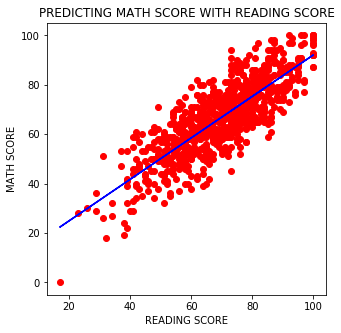

In [45]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, linear_regressor.predict(x_train), color = "blue")
plt.title("PREDICTING MATH SCORE WITH READING SCORE")
plt.xlabel("READING SCORE")
plt.ylabel("MATH SCORE")
#plt.savefig('basic_linear_regression.png')
plt.show()

In [46]:
mae = mean_absolute_error(linear_regressor.predict(x_test), y_test)
mse = mean_squared_error(linear_regressor.predict(x_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 7.50
Mean Squared Error (MSE): 84.92
Root Mean Squared Error (RMSE): 9.22


Performing prediction for math score

In [47]:
X = df.iloc[:, 7:8].values
Y = df.iloc[:, 5].values

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 34)

In [49]:
linear_regressor.fit(X_train, Y_train)
print("R score: {0}".format(round(linear_regressor.score(X_train, Y_train),2)))

R score: 0.64


In [50]:
print("Intercept: {0}".format(round(linear_regressor.intercept_),))
#pd.DataFrame({'feature':X.columns, 'coef':linear_regressor.coef_})

Intercept: 12.0


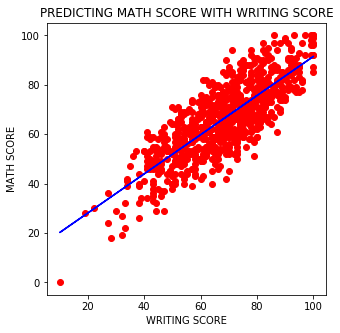

In [51]:
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_train, linear_regressor.predict(X_train), color = "blue")
plt.title("PREDICTING MATH SCORE WITH WRITING SCORE")
plt.xlabel("WRITING SCORE")
plt.ylabel("MATH SCORE")
#plt.savefig('basic_linear_regression.png')
plt.show()

In [52]:
mae = mean_absolute_error(linear_regressor.predict(X_test), Y_test)
mse = mean_squared_error(linear_regressor.predict(X_test), Y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 7.46
Mean Squared Error (MSE): 84.79
Root Mean Squared Error (RMSE): 9.21
